In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = nk.data("bio_eventrelated_100hz")
data

,ECG,EDA,Photosensor,RSP
0,-0.015869,13.196868,5.0,0.778931
1,-0.011703,13.197173,5.0,0.777588
2,-0.009766,13.197020,5.0,0.777435
3,-0.013321,13.197631,5.0,0.777557
4,-0.009583,13.196715,5.0,0.775299
...,...,...,...,...
14995,-0.007675,14.873656,5.0,1.351868
14996,-0.005203,14.873961,5.0,1.356689
14997,-0.004272,14.874266,5.0,1.361938
14998,-0.000458,14.875335,5.0,1.366821


In [4]:
condition_list = ['Negative','Neutral','Neutral','Negative']
condition_list

['Negative', 'Neutral', 'Neutral', 'Negative']

In [5]:
# Find events
events = nk.events_find(data["Photosensor"], threshold_keep='below', event_conditions=condition_list)
events

{'onset': array([ 1024,  4957,  9224, 12984]),
 'duration': array([300, 300, 300, 300]),
 'label': array(['1', '2', '3', '4'], dtype='<U11'),
 'condition': ['Negative', 'Neutral', 'Neutral', 'Negative']}

In [6]:
data

,ECG,EDA,Photosensor,RSP
0,-0.015869,13.196868,5.0,0.778931
1,-0.011703,13.197173,5.0,0.777588
2,-0.009766,13.197020,5.0,0.777435
3,-0.013321,13.197631,5.0,0.777557
4,-0.009583,13.196715,5.0,0.775299
...,...,...,...,...
14995,-0.007675,14.873656,5.0,1.351868
14996,-0.005203,14.873961,5.0,1.356689
14997,-0.004272,14.874266,5.0,1.361938
14998,-0.000458,14.875335,5.0,1.366821


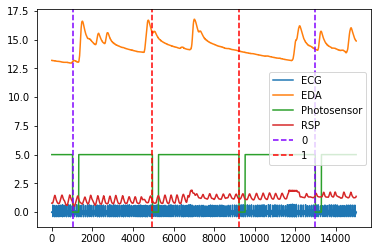

In [7]:
# Plot the location of event with the signals
plot = nk.events_plot(events, data)


In [9]:
print(plot)

None


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

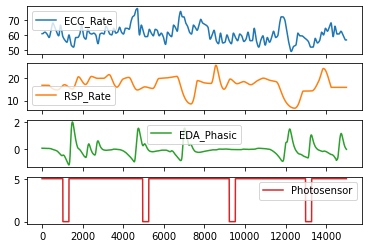

In [12]:
# Process the signal
data_clean, info = nk.bio_process(ecg=data["ECG"], 
                                  rsp=data["RSP"], 
                                  eda=data["EDA"], 
                                  keep=data["Photosensor"], 
                                  sampling_rate=100)

# Visualize some of the channels
data_clean[["ECG_Rate", "RSP_Rate", "EDA_Phasic", "Photosensor"]].plot(subplots=True)

In [14]:
data_clean

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,...,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime,Photosensor,RSA_P2T,RSA_Gates
0,-0.015869,0.001499,60.858467,0.965248,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.09,8.499165
1,-0.011703,0.004621,60.858467,0.965248,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.09,8.499165
2,-0.009766,0.005260,60.858467,0.965248,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.09,8.499165
3,-0.013321,0.004423,60.858467,0.965248,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.09,8.499165
4,-0.009583,0.005670,60.858467,0.965248,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.09,8.499165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.007675,0.011875,56.603774,0.676045,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.04,8.734514
14996,-0.005203,0.011978,56.603774,0.676045,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.04,8.734514
14997,-0.004272,0.012345,56.603774,0.676045,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.04,8.734514
14998,-0.000458,0.012854,56.603774,0.676045,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0,0.0,5.0,0.04,8.734514


In [15]:
# Build and plot epochs
epochs = nk.epochs_create(data_clean, events, sampling_rate=100, epochs_start=-1, epochs_end=6)
epochs.values()

d:\Software\mini\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


dict_values([            ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  \
-1.000000  0.041336   0.049079  66.369097     0.953546            0   
-0.989986  0.042221   0.051574  66.323940     0.954400            0   
-0.979971  0.048660   0.056594  66.275980     0.955245            0   
-0.969957  0.054962   0.063871  66.225295     0.956079            0   
-0.959943  0.065018   0.072078  66.171963     0.956904            0   
...             ...        ...        ...          ...          ...   
 5.959943 -0.002014   0.004758  55.887255     0.863444            0   
 5.969957  0.001297   0.006451  55.980611     0.862755            0   
 5.979971  0.002884   0.007675  56.073343     0.862094            0   
 5.989986  0.001297   0.007797  56.165370     0.861462            0   
 6.000000  0.003372   0.010030  56.256607     0.860858            0   

           ECG_P_Peaks  ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  \
-1.000000            0             0              0            0  

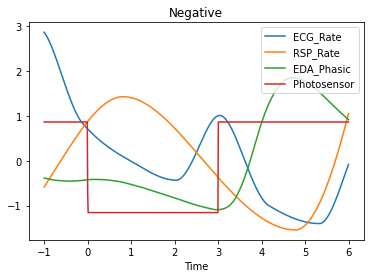

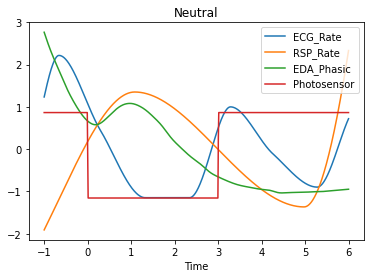

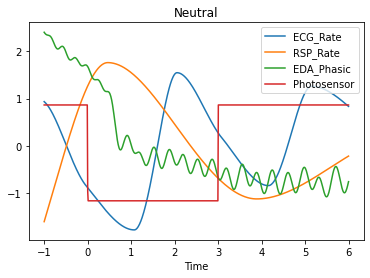

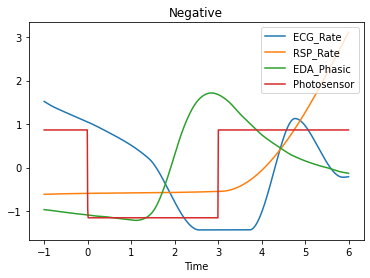

In [16]:
# Iterate through epoch data
for epoch in epochs.values():
    # Plot scaled signals
    nk.signal_plot(epoch[['ECG_Rate', 'RSP_Rate','EDA_Phasic', "Photosensor"]], 
                   title=epoch['Condition'].values[0],  # Extract condition name
                   standardize=True)

In [63]:
df = nk.bio_analyze(epochs,sampling_rate=100)
df

,Label,Condition,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,...,RSP_RVT_Baseline,RSP_RVT_Mean,EDA_Peak_Amplitude,EDA_SCR,SCR_Peak_Amplitude,SCR_Peak_Amplitude_Time,SCR_RiseTime,SCR_RecoveryTime,RSA_P2T,RSA_Gates
1,1,Negative,1024,58.962843,1.037157,-7.238706,-3.416404,2.462046,3.035765,5.329041,...,0.225643,-0.037677,1.995617,1,3.114808,4.718169,1.74,NaN,-0.031061,-1.776357e-15
2,2,Neutral,4957,64.000846,-0.056683,-5.177317,-3.209327,1.661333,0.011445,1.323319,...,0.169809,0.019351,0.868942,0,NaN,NaN,NaN,NaN,-0.030944,-7.601609e-02
3,3,Neutral,9224,55.976284,5.248206,-1.922230,1.891089,2.279224,2.054363,1.072961,...,0.127095,0.017846,0.026651,0,NaN,NaN,NaN,NaN,-0.024188,1.358487e-01
4,4,Negative,12984,57.505912,0.186396,-5.781774,-2.941543,2.142268,4.768240,2.565093,...,0.080601,0.012434,1.056855,1,1.675922,2.845494,1.73,477.0,-0.020054,1.843122e-01


In [18]:
sns.boxplot(x="Condition", y="ECG_Rate_Mean", data=df);

NameError: name 'df' is not defined

In [19]:
sns.boxplot(x="Condition", y="RSP_Rate_Mean", data=df);

NameError: name 'df' is not defined

In [17]:
sns.boxplot(x="Condition", y="EDA_Peak_Amplitude", data=df);

NameError: name 'df' is not defined

In [20]:
data = nk.data("bio_resting_5min_100hz")

In [21]:
data

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669
...,...,...,...
29995,-0.045986,-0.135498,0.981111
29996,-0.107841,-0.155334,0.978866
29997,-0.058274,-0.173721,0.976366
29998,-0.056472,-0.192108,0.972202


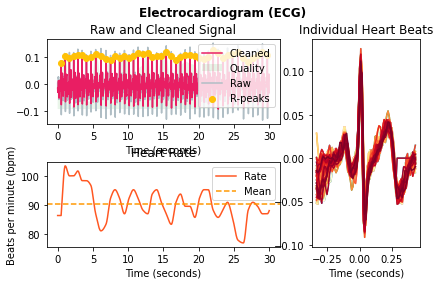

In [74]:
ecg_signals, info = nk.ecg_process(data['ECG'], sampling_rate=100)
nk.ecg_plot(ecg_signals[:3000],sampling_rate=100)

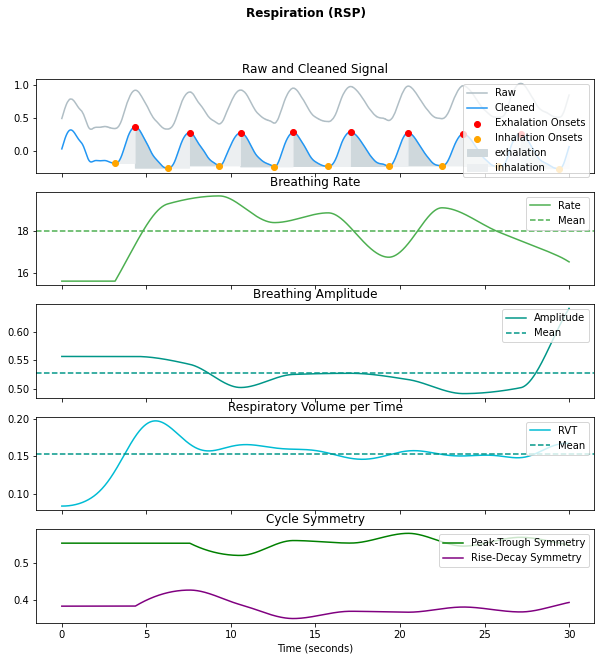

In [75]:
# Process rsp
rsp_signals, info = nk.rsp_process(data["RSP"], sampling_rate=100)

nk.rsp_plot(rsp_signals[:3000], sampling_rate=100)

In [76]:
nk.ecg_intervalrelated(ecg_signals)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,86.392105,69.475638,4.903604,NaN,NaN,NaN,NaN,NaN,NaN,3.883777,...,1.978637,4.256941,1.268694,1.404138,1.469801,2.57268,1.562676,1.846507,2.722348,0.873124


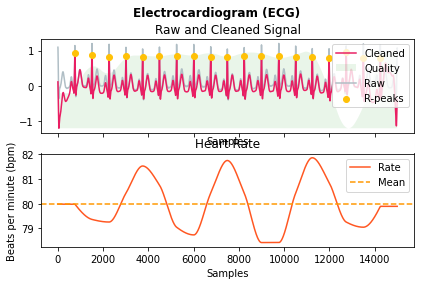

In [80]:
# Simulate ecg signal (you can use your own one)
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)

# Default processing pipeline
signals, info = nk.ecg_process(ecg, sampling_rate=1000)

# Visualize
nk.ecg_plot(signals)

In [26]:
!pip install psychopy

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1

  Using cached PsychoPy-2022.2.5-py2.py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached msgpack_numpy-0.4.8-py2.py3-none-any.whl (6.9 kB)
  Using cached soundfile-0.11.0-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached markdown_it_py-2.1.0-py3-none-any.whl (84 kB)
  Using cached pyo-1.0.4-cp39-cp39-win_amd64.whl (8.2 MB)
  Using cached google_auth-2.16.0-py2.py3-none-any.whl (177 kB)
  Using cached gevent-22.10.2-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached python_gitlab-3.12.0-py3-none-any.whl (130 kB)
  Using cached imageio_ffmpeg-0.4.8-py3-none-win_amd64.whl (22.6 MB)
  Using cached imageio-2.25.0-py3-none-any.whl (3.4 MB)
  Using cached psychtoolbox-3.0.18.2-cp39-cp39-win_amd64.whl (488 kB)
  Using cached moviepy-1.0.3-py3-none-any.whl
  Using cached pygame-2.1.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached freetype_py-2.3.0-py3-none-win_amd64.whl (772 kB)
  Using cached google_api_core-2.11.0-py3-none-any.whl (120 kB)
  Using cache


  ╰─> [16 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\pyWinhook
      copying pyWinhook\aa hook.py -> build\lib.win-amd64-cpython-39\pyWinhook
      copying pyWinhook\doc.py -> build\lib.win-amd64-cpython-39\pyWinhook
      copying pyWinhook\example.py -> build\lib.win-amd64-cpython-39\pyWinhook
      copying pyWinhook\HookManager.py -> build\lib.win-amd64-cpython-39\pyWinhook
      copying pyWinhook\__init__.py -> build\lib.win-amd64-cpython-39\pyWinhook
      running build_ext
      building 'pyWinhook._cpyHook' extension
      swigging pyWinhook/cpyHook.i to pyWinhook/cpyHook_wrap.c
      swig.exe -python -o pyWinhook/cpyHook_wrap.c pyWinhook/cpyHook.i
      error: command 'swig.exe' failed: None
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed buildin

In [25]:
import psychopy


ModuleNotFoundError: No module named 'psychopy'